# Gender Recognition by Voice Using Numerical Algorithms

## Importing Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [2]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,-4.049248,-4.224901,-2.576102,-5.693607,-0.214778,0.427355,2.925892,3.177486,-0.039083,0.471575,-2.141210,-1.812038,-1.384486,0.636793,-1.454772,-1.564205,-0.708404,-1.431422,-1.419137,male
1,-3.841053,-3.999293,-2.486885,-5.588987,-0.258485,0.611669,4.032721,4.022523,-0.065236,0.594431,-2.141210,-1.079594,-1.369352,-0.524133,-1.014103,-1.561916,-0.708404,-1.418107,-1.405818,male
2,-3.463066,-4.095851,-2.706986,-3.928699,0.909326,1.603848,4.675089,4.506253,-1.083730,0.398261,-2.141210,-1.365368,-1.390131,0.404082,-1.065344,-1.563866,-0.708404,-1.429203,-1.416917,male
3,-0.992157,-0.759454,-0.901418,-0.711205,0.632690,0.899998,-0.927599,-0.837709,1.516383,1.797340,-1.054576,-1.666966,-1.143909,-0.524133,0.614286,-1.195367,-0.708404,-1.273867,-1.261532,male
4,-1.530640,-1.676948,-1.268395,-0.792029,1.005588,1.322561,-1.055855,-0.807635,1.708336,2.114740,-0.790514,-1.127233,-1.239725,0.189238,0.289046,-0.221660,-0.708404,0.124154,0.136933,male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Extracting Important Features

In order to explore more models, we will firstly use the two most important features only. Which makes the model simpler and easier to interpret.

In [4]:
X_train_important = X_train[["meanfun", "IQR"]]
X_test_important = X_test[["meanfun", "IQR"]]

## Logistic Regression

In logistic regression, we try to use regression to predict the probability of the label, which is $p(y=\mathtt{male}\mid X=X_i)$.

The general form of logistic regression is as follows:
$$
\begin{align}
\hat{p}(y=k\mid X=x) &= \frac{e^{\beta_{k0}+\beta_{k}^T x}}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}} , &k=1,\cdots,K-1\\
\hat{p}(y=K\mid X=x) &= \frac{1}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}}
\end{align}
$$

Since we only have two classes, we can simplify the model to:
$$
\hat{p}(y=\mathtt{male}\mid X=x) = \frac{e^{\beta_0+\beta^T x}}{1+e^{\beta_0+\beta^T x}}=\frac{1}{1+e^{-(\beta_0+\sum_{i=1}^n \beta_i x_i)}}
$$

Firstly, for ease of interpretation, we will use only one feature, which is `meanfun`.

beta_0: -0.20
beta_1: -5.85
Training set accuracy: 0.95
Test set accuracy: 0.95
True Positive Rate: 0.9605
True Negative Rate: 0.9329
False Positive Rate: 0.0671
False Negative Rate: 0.0395
Training set accuracy: 0.9543
Test set accuracy: 0.9468


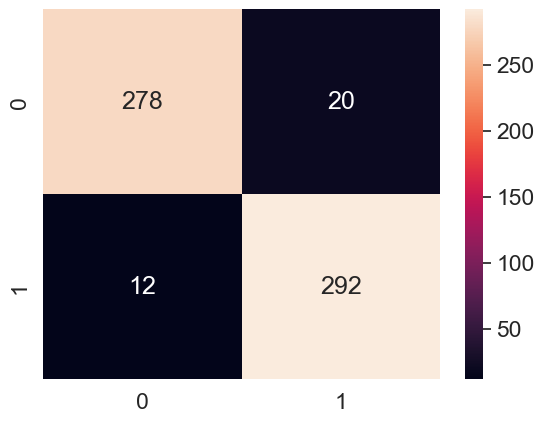

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87).fit(X_train_important[["meanfun"]], y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important[["meanfun"]], y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_important[["meanfun"]], y_test)))
sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])).ravel()
TPR_logreg_1 = TP / (TP + FN)
TNR_logreg_1 = TN / (TN + FP)
FPR_logreg_1 = FP / (FP + TN)
FNR_logreg_1 = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_logreg_1))
print("True Negative Rate: {:.4f}".format(TNR_logreg_1))
print("False Positive Rate: {:.4f}".format(FPR_logreg_1))
print("False Negative Rate: {:.4f}".format(FNR_logreg_1))

logreg_1_train_accuracy = logreg.score(X_train_important[["meanfun"]], y_train.squeeze())
logreg_1_test_accuracy = logreg.score(X_test_important[["meanfun"]], y_test.squeeze())

print("Training set accuracy: {:.4f}".format(logreg_1_train_accuracy))
print("Test set accuracy: {:.4f}".format(logreg_1_test_accuracy))

We try to plot the regression line of the model.

<Axes: xlabel='meanfun', ylabel='label'>

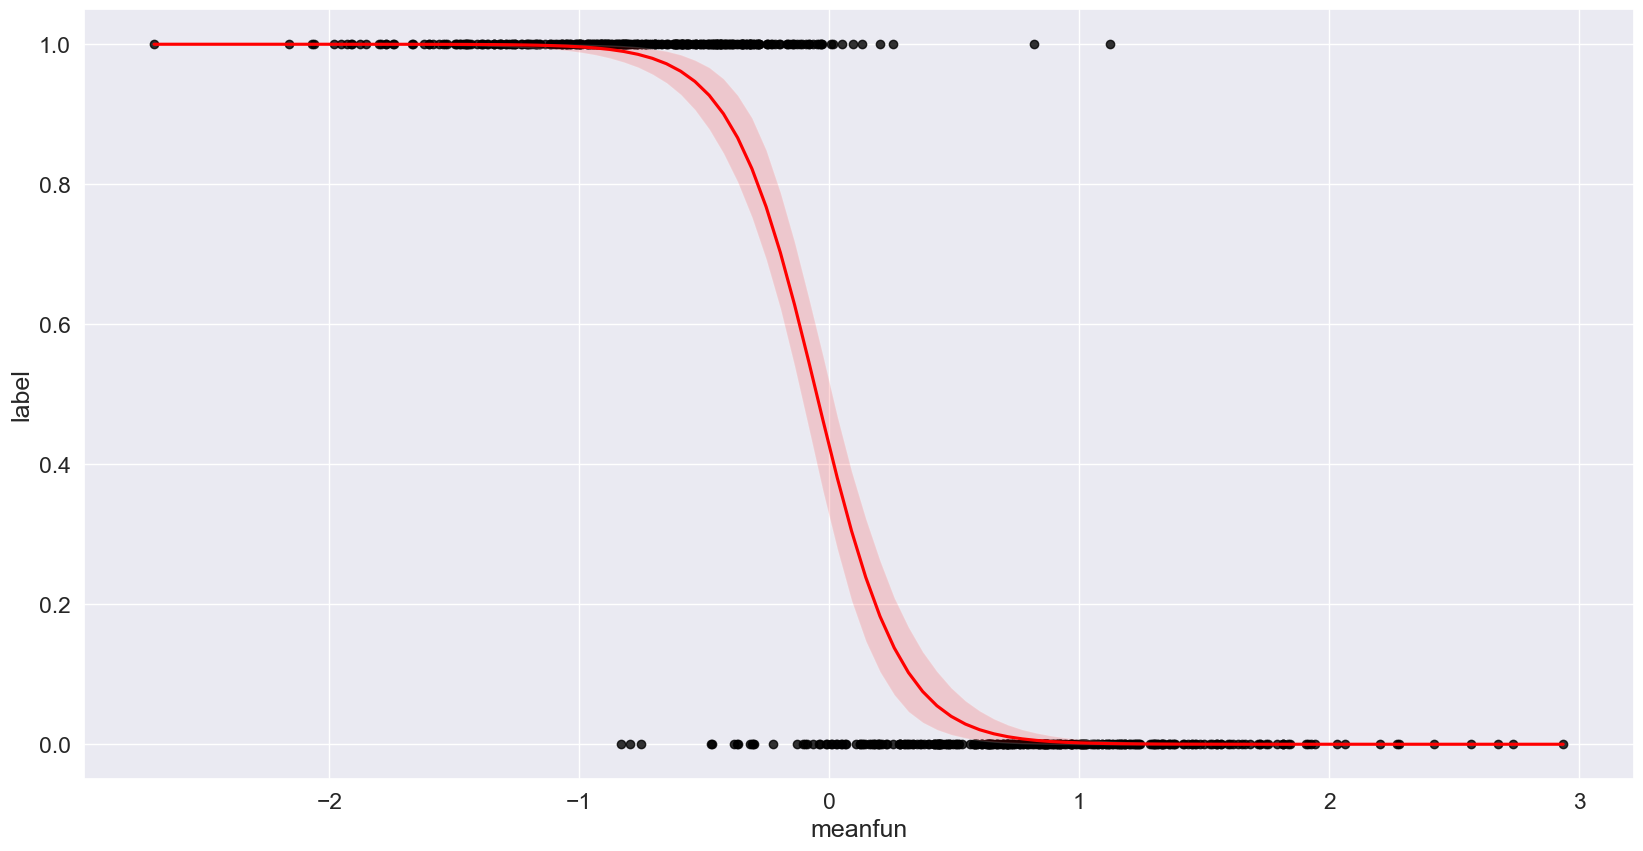

In [6]:
x_plot = X_test_important[["meanfun"]]
y_plot = y_test["label"] == "male"
plt.figure(figsize=(20, 10))
sns.regplot(x=x_plot, y=y_plot, logistic=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})

We try to use the two most important features.

beta_0: -0.3448
beta_1: -5.0235
beta_2: 1.9310
Training set accuracy: 0.9676
Test set accuracy: 0.9635
True Positive Rate: 0.9704
True Negative Rate: 0.9564
False Positive Rate: 0.0436
False Negative Rate: 0.0296


<Axes: >

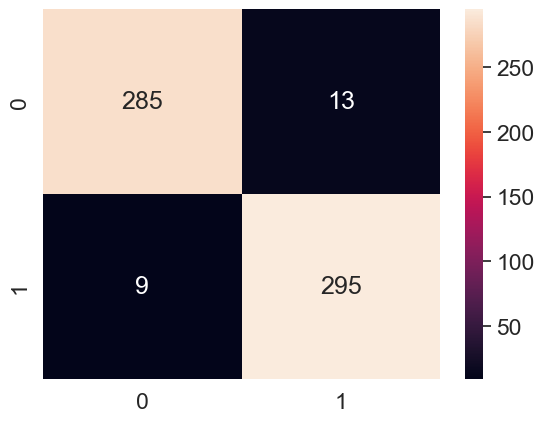

In [7]:
logreg = LogisticRegression(random_state=87).fit(X_train_important, y_train.squeeze())
print("beta_0: {:.4f}".format(logreg.intercept_[0]))
print("beta_1: {:.4f}".format(logreg.coef_[0][0]))
print("beta_2: {:.4f}".format(logreg.coef_[0][1]))
print("Training set accuracy: {:.4f}".format(logreg.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(logreg.score(X_test_important, y_test)))

logreg_2_train_accuracy = logreg.score(X_train_important, y_train.squeeze())
logreg_2_test_accuracy = logreg.score(X_test_important, y_test.squeeze())

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important)).ravel()
TPR_logreg_2 = TP / (TP + FN)
TNR_logreg_2 = TN / (TN + FP)
FPR_logreg_2 = FP / (FP + TN)
FNR_logreg_2 = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_logreg_2))
print("True Negative Rate: {:.4f}".format(TNR_logreg_2))
print("False Positive Rate: {:.4f}".format(FPR_logreg_2))
print("False Negative Rate: {:.4f}".format(FNR_logreg_2))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important)), annot=True, fmt="d")

We try to plot the probability of the label for the model.

C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='meanfun', ylabel='IQR'>

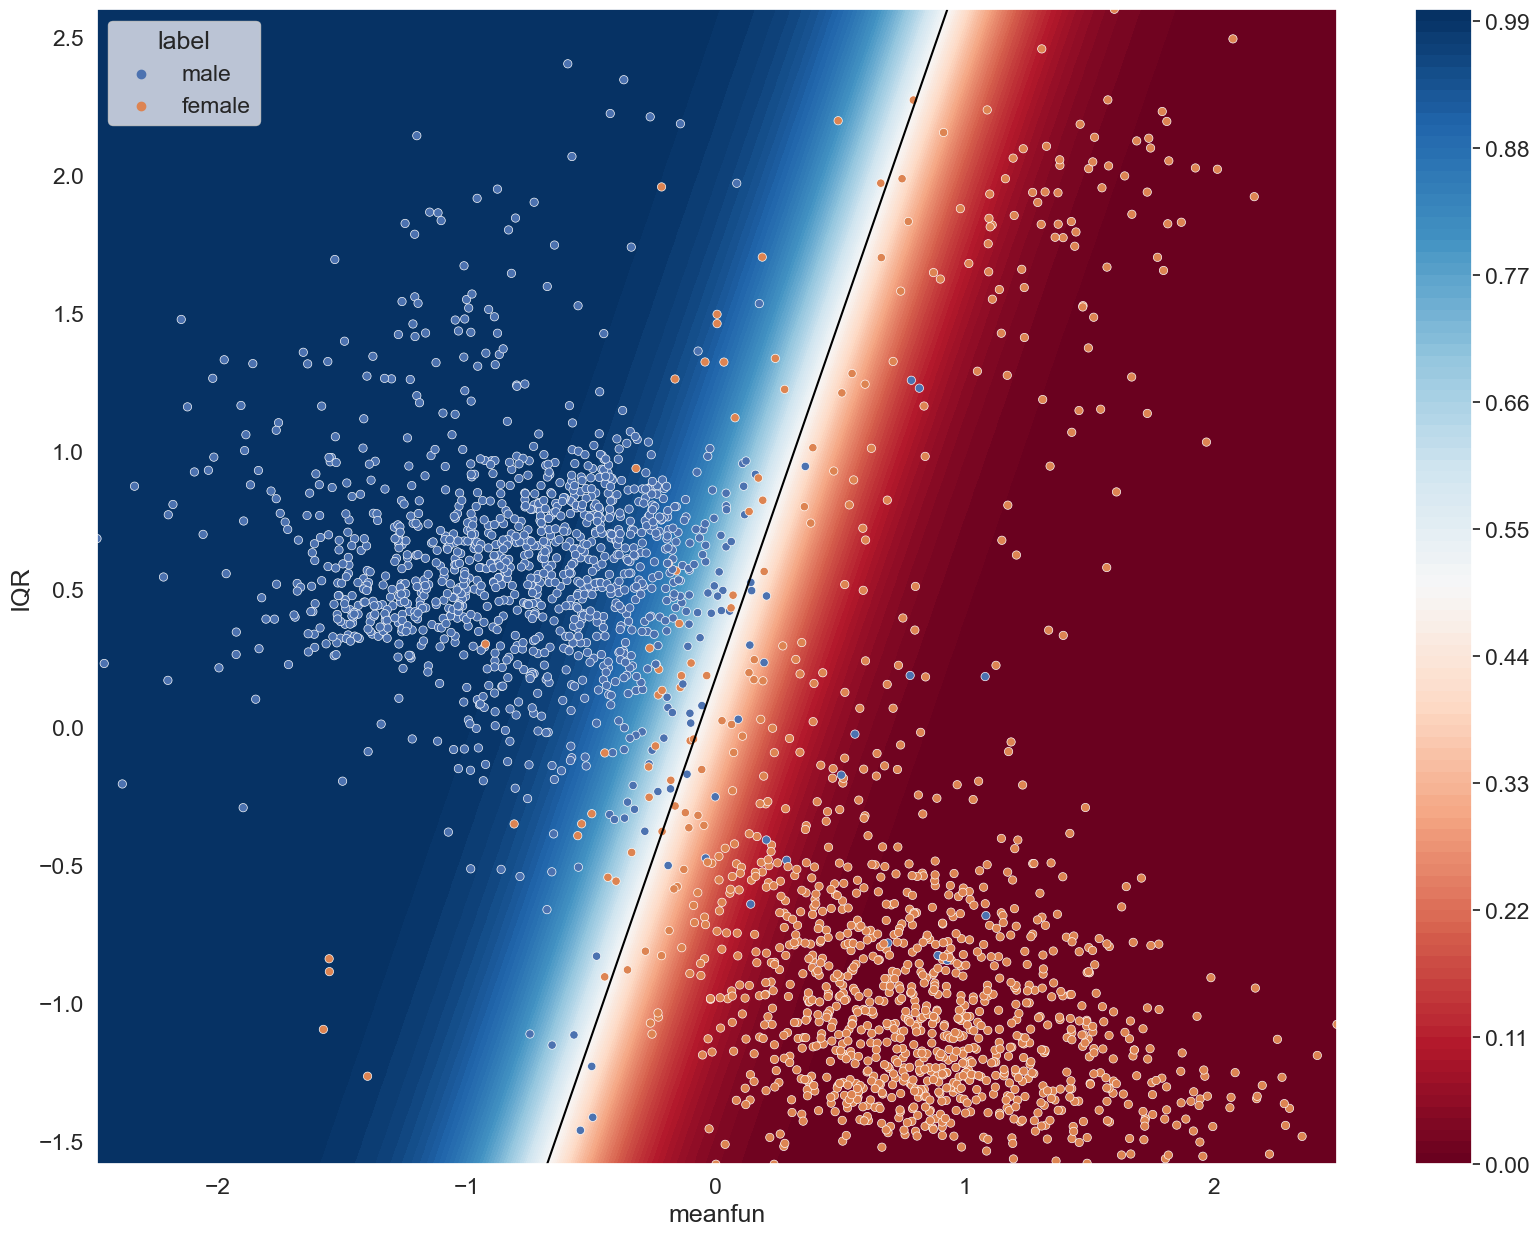

In [8]:
plt.figure(figsize=(20, 15))
x_plot = np.linspace(X_train_important["meanfun"].min(), X_train_important["meanfun"].max(), 100)
y_plot = np.linspace(X_train_important["IQR"].min(), X_train_important["IQR"].max(), 100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = logreg.predict_proba(pd.DataFrame(np.array([X_plot.ravel(), Y_plot.ravel()]).T))[:, 1].reshape(X_plot.shape)
plt.contour(X_plot, Y_plot, Z_plot, levels=[0.5], colors="black")
plt.contourf(X_plot, Y_plot, Z_plot, levels=100, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
sns.scatterplot(X_train_important, x="meanfun", y="IQR", hue=y_train["label"], sizes=(20, 200))

Then we try to use all the features.

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())
print("beta_0: {:.4f}".format(logreg.intercept_[0]))
for i, beta in enumerate(logreg.coef_[0]):
    print("beta_{}: {:.4f}".format(i + 1, beta))

beta_0: -0.6485
beta_1: 0.2392
beta_2: -0.1842
beta_3: -1.0164
beta_4: 0.5828
beta_5: 1.4786
beta_6: 0.3259
beta_7: 0.5136
beta_8: -0.7163
beta_9: 1.0019
beta_10: -1.4775
beta_11: 0.1540
beta_12: -4.8131
beta_13: 0.6594
beta_14: -0.1682
beta_15: -0.2694
beta_16: -0.1644
beta_17: -0.0062
beta_18: 0.0045
beta_19: 0.0046


Training set accuracy: 0.9763
Test set accuracy: 0.9734
True Positive Rate: 0.9704
True Negative Rate: 0.9765
False Positive Rate: 0.0235
False Negative Rate: 0.0296


<Axes: >

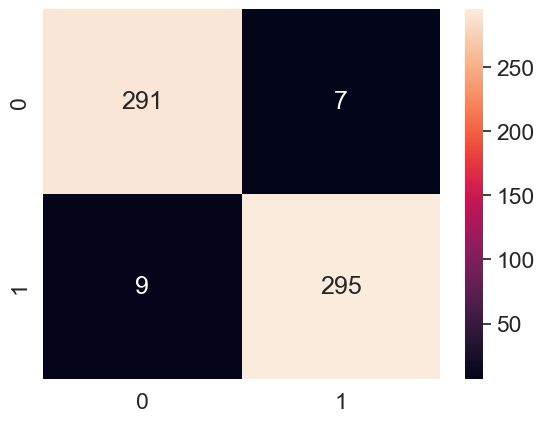

In [10]:
logreg_3_train_accuracy = logreg.score(X_train, y_train)
logreg_3_test_accuracy = logreg.score(X_test, y_test)

print("Training set accuracy: {:.4f}".format(logreg.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(logreg.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test)).ravel()
TPR_logreg_3 = TP / (TP + FN)
TNR_logreg_3 = TN / (TN + FP)
FPR_logreg_3 = FP / (FP + TN)
FNR_logreg_3 = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_logreg_3))
print("True Negative Rate: {:.4f}".format(TNR_logreg_3))
print("False Positive Rate: {:.4f}".format(FPR_logreg_3))
print("False Negative Rate: {:.4f}".format(FNR_logreg_3))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt="d")

We try to summarize the performance of the logistic regression model.

In [11]:
results = pd.DataFrame(
    {
        "Model": ["Logistic Regression with 1 feature",
                  "Logistic Regression with 2 features",
                  "Logistic Regression with all features"],
        "Training Accuracy": [logreg_1_train_accuracy,
                              logreg_2_train_accuracy,
                              logreg_3_train_accuracy],
        "Test Accuracy": [logreg_1_test_accuracy,
                          logreg_2_test_accuracy,
                          logreg_3_test_accuracy],
    }
)
results

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression with 1 feature,0.954300,0.946844
1,Logistic Regression with 2 features,0.967595,0.963455
2,Logistic Regression with all features,0.976319,0.973422


## K-Nearest Neighbors

K-nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Training set accuracy: 1.0000
Test set accuracy: 0.9817
True Positive Rate: 0.9868
True Negative Rate: 0.9765
False Positive Rate: 0.0235
False Negative Rate: 0.0132


<Axes: >

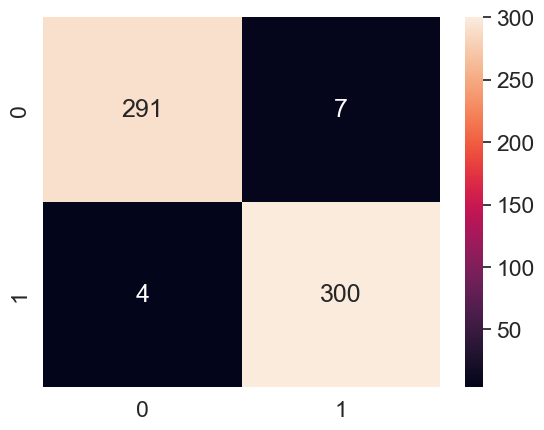

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(knn.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, knn.predict(X_test)).ravel()
TPR_knn = TP / (TP + FN)
TNR_knn = TN / (TN + FP)
FPR_knn = FP / (FP + TN)
FNR_knn = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_knn))
print("True Negative Rate: {:.4f}".format(TNR_knn))
print("False Positive Rate: {:.4f}".format(FPR_knn))
print("False Negative Rate: {:.4f}".format(FNR_knn))

sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, fmt="d")

## Support Vector Machines

Support vector machines are a powerful and flexible class of supervised algorithms for both classification and regression. They are particularly well suited for classification of complex but small- or medium-sized datasets.

We try to use it in our dataset.

The main idea of SVM is to find a hyperplane that can separate the data. The hyperplane is the decision boundary that separates the data into different classes. The goal is to find the hyperplane that has the largest distance to the nearest data points of any class. This is called the maximum margin hyperplane.

Training set accuracy: 0.9896
Test set accuracy: 0.9834
True Positive Rate: 0.9770
True Negative Rate: 0.9899
False Positive Rate: 0.0101
False Negative Rate: 0.0230


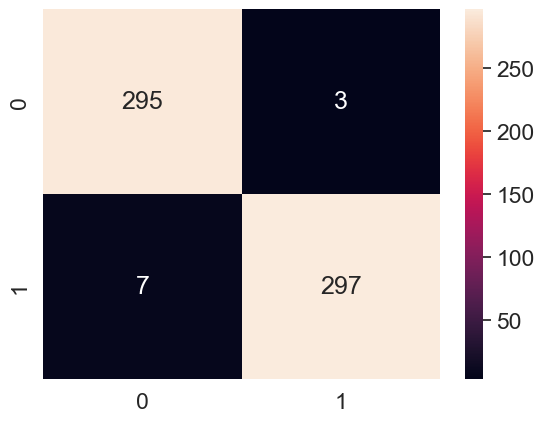

In [13]:
from sklearn.svm import SVC

svm = SVC(random_state=87).fit(X_train, y_train.squeeze())

print("Training set accuracy: {:.4f}".format(svm.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.4f}".format(svm.score(X_test, y_test.squeeze())))
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test)).ravel()
TPR_svm = TP / (TP + FN)
TNR_svm = TN / (TN + FP)
FPR_svm = FP / (FP + TN)
FNR_svm = FN / (FN + TP)

print("True Positive Rate: {:.4f}".format(TPR_svm))
print("True Negative Rate: {:.4f}".format(TNR_svm))
print("False Positive Rate: {:.4f}".format(FPR_svm))
print("False Negative Rate: {:.4f}".format(FNR_svm))

### SVM with All Features

Now we will use all features to train the SVM model.

In [14]:
from sklearn.svm import SVC


def train_with_all_features(kernel):
    svm = SVC(random_state=87, kernel=kernel).fit(X_train, y_train.squeeze())

    train_accuracy = svm.score(X_train, y_train)
    test_accuracy = svm.score(X_test, y_test)

    print("Training set accuracy: {:.6f}".format(train_accuracy))
    print("Test set accuracy: {:.6f}".format(test_accuracy))
    sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt="d")

    TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test)).ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    return train_accuracy, test_accuracy, TPR, TNR, FPR, FNR

#### Linear Kernel

Training set accuracy: 0.978812
Test set accuracy: 0.971761


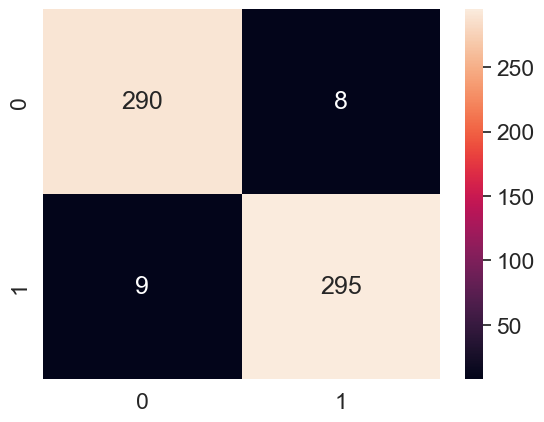

In [15]:
train_accuracy_svm_all_linear, test_accuracy_svm_all_linear, TPR_svm_all_linear, TNR_svm_all_linear, FPR_svm_all_linear, FNR_svm_all_linear = train_with_all_features(
    "linear")

#### Polynomial Kernel

Training set accuracy: 0.981305
Test set accuracy: 0.970100


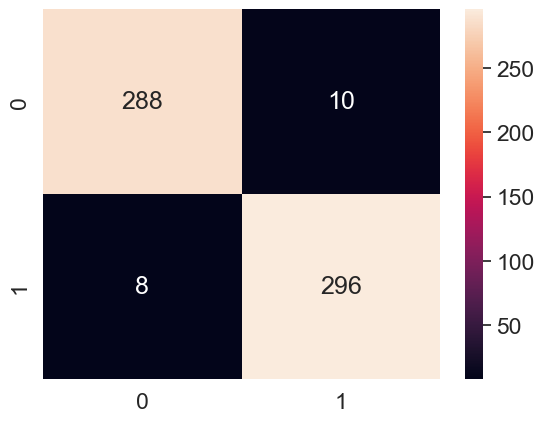

In [16]:
train_accuracy_svm_all_poly, test_accuracy_svm_all_poly, TPR_svm_all_poly, TNR_svm_all_poly, FPR_svm_all_poly, FNR_svm_all_poly = train_with_all_features(
    "poly")

#### Gaussian Kernel

Training set accuracy: 0.989614
Test set accuracy: 0.983389


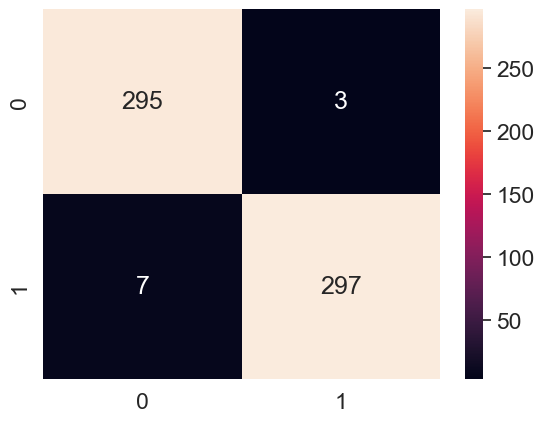

In [17]:
train_accuracy_svm_all_gaussian, test_accuracy_svm_all_gaussian, TPR_svm_all_gaussian, TNR_svm_all_gaussian, FPR_svm_all_gaussian, FNR_svm_all_gaussian = train_with_all_features(
    "rbf")

#### Sigmoid Kernel

Training set accuracy: 0.830494
Test set accuracy: 0.823920


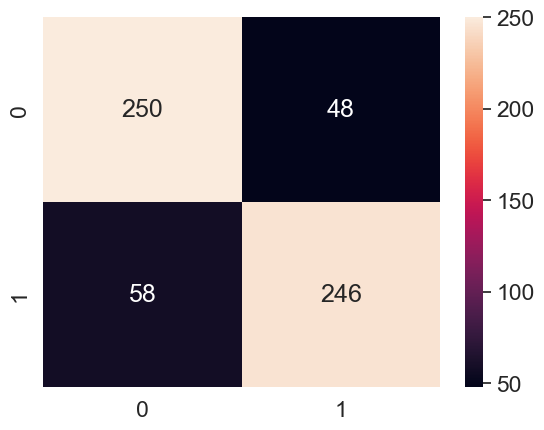

In [18]:
train_accuracy_svm_all_sigmoid, test_accuracy_svm_all_sigmoid, TPR_svm_all_sigmoid, TNR_svm_all_sigmoid, FPR_svm_all_sigmoid, FNR_svm_all_sigmoid = train_with_all_features(
    "sigmoid")

#### Comparison

Here are the comparison of the results of the different kernels:

In [19]:
results = pd.DataFrame(
    {
        "Kernel": ["Linear", "Polynomial", "Gaussian", "Sigmoid"],
        "Training Accuracy": [
            train_accuracy_svm_all_linear,
            train_accuracy_svm_all_poly,
            train_accuracy_svm_all_gaussian,
            train_accuracy_svm_all_sigmoid,
        ],
        "Test Accuracy": [
            test_accuracy_svm_all_linear,
            test_accuracy_svm_all_poly,
            test_accuracy_svm_all_gaussian,
            test_accuracy_svm_all_sigmoid,
        ],
        "True Positive Rate": [
            TPR_svm_all_linear,
            TPR_svm_all_poly,
            TPR_svm_all_gaussian,
            TPR_svm_all_sigmoid,
        ],
        "True Negative Rate": [
            TNR_svm_all_linear,
            TNR_svm_all_poly,
            TNR_svm_all_gaussian,
            TNR_svm_all_sigmoid,
        ],
        "False Positive Rate": [
            FPR_svm_all_linear,
            FPR_svm_all_poly,
            FPR_svm_all_gaussian,
            FPR_svm_all_sigmoid,
        ],
        "False Negative Rate": [
            FNR_svm_all_linear,
            FNR_svm_all_poly,
            FNR_svm_all_gaussian,
            FNR_svm_all_sigmoid,
        ],
    }
)
results

,Kernel,Training Accuracy,Test Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate
0,Linear,0.978812,0.971761,0.970395,0.973154,0.026846,0.029605
1,Polynomial,0.981305,0.970100,0.973684,0.966443,0.033557,0.026316
2,Gaussian,0.989614,0.983389,0.976974,0.989933,0.010067,0.023026
3,Sigmoid,0.830494,0.823920,0.809211,0.838926,0.161074,0.190789


## Neural Network *

In [20]:
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

test_accuracy_mlp = np.zeros((9, 9))
train_accuracy_mlp = np.zeros((9, 9))

for depth in range(1, 10):
    for width in range(1, 10):
        mlp = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(width * 10,) * depth * 10).fit(X_train, y_train.squeeze())
        test_accuracy_mlp[depth-1, width-1] = mlp.score(X_test, y_test.squeeze())
        train_accuracy_mlp[depth-1, width-1] = mlp.score(X_train, y_train.squeeze())
        print("Depth: {}, Width: {}".format(depth, width))

f, ax = plt.subplots(1, 2, figsize=(20, 10))
im1 = ax[0].imshow(train_accuracy_mlp, cmap='hot', interpolation='nearest', origin='lower')
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Depth')
ax[0].set_title('Train Accuracy Heatmap')
plt.colorbar(im1, ax=ax[0])

im2 = ax[1].imshow(test_accuracy_mlp, cmap='hot', interpolation='nearest', origin='lower')
ax[1].set_xlabel('Width')
ax[1].set_ylabel('Depth')
ax[1].set_title('Test Accuracy Heatmap')
plt.colorbar(im2, ax=ax[1])

plt.show()
"""

'\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn.neural_network import MLPClassifier\n\ntest_accuracy_mlp = np.zeros((9, 9))\ntrain_accuracy_mlp = np.zeros((9, 9))\n\nfor depth in range(1, 10):\n    for width in range(1, 10):\n        mlp = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(width * 10,) * depth * 10).fit(X_train, y_train.squeeze())\n        test_accuracy_mlp[depth-1, width-1] = mlp.score(X_test, y_test.squeeze())\n        train_accuracy_mlp[depth-1, width-1] = mlp.score(X_train, y_train.squeeze())\n        print("Depth: {}, Width: {}".format(depth, width))\n\nf, ax = plt.subplots(1, 2, figsize=(20, 10))\nim1 = ax[0].imshow(train_accuracy_mlp, cmap=\'hot\', interpolation=\'nearest\', origin=\'lower\')\nax[0].set_xlabel(\'Width\')\nax[0].set_ylabel(\'Depth\')\nax[0].set_title(\'Train Accuracy Heatmap\')\nplt.colorbar(im1, ax=ax[0])\n\nim2 = ax[1].imshow(test_accuracy_mlp, cmap=\'hot\', interpolation=\'nearest\', origin=\'lower\')\nax[1]

In [21]:
"""
plt.plot(range(1, 50), test_accuracy_mlp, label="Test Accuracy")
plt.plot(range(1, 50), train_accuracy_mlp, label="Train Accuracy")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
"""

'\nplt.plot(range(1, 50), test_accuracy_mlp, label="Test Accuracy")\nplt.plot(range(1, 50), train_accuracy_mlp, label="Train Accuracy")\nplt.xlabel("Hidden Layer Size")\nplt.ylabel("Accuracy")\nplt.legend()\nplt.show()\n'

In [22]:
"""
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())
"""

'\nfrom sklearn.neural_network import MLPClassifier\n\nmlp = MLPClassifier(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())\n'

In [23]:
# mlp.score(X_train, y_train)

In [24]:
#mlp.score(X_test, y_test)

In [25]:
# y_prediction = mlp.predict(X_test)

In [26]:
# sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [27]:
# mlp2 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100)).fit(X_train, y_train.squeeze())

In [28]:
# mlp2.score(X_train, y_train)

In [29]:
# mlp2.score(X_test, y_test)

In [30]:
# y_prediction = mlp2.predict(X_test)

In [31]:
# sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [32]:
# mlp3 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100)).fit(X_train, y_train.squeeze())

In [33]:
# mlp3.score(X_train, y_train)

In [34]:
# mlp3.score(X_test, y_test)

In [35]:
# y_prediction = mlp3.predict(X_test)

In [36]:
# sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [37]:
# mlp4 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100, 100)).fit(X_train, y_train.squeeze())

In [38]:
# mlp4.score(X_train, y_train)

In [39]:
# mlp4.score(X_test, y_test)

In [40]:
# y_prediction = mlp4.predict(X_test)

In [41]:
# sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")